# Projeto Ciência de Dados - Previsão de Vendas

- O desafio é conseguir prever as vendas que uma empresa ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que essa empresa investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

In [31]:
#Importar a base de dados

import pandas as pd

tabela = pd.read_csv("advertising.csv")
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Visualizar como as informações de cada item estão distribuídas
- Ver a correlação entre cada um dos itens

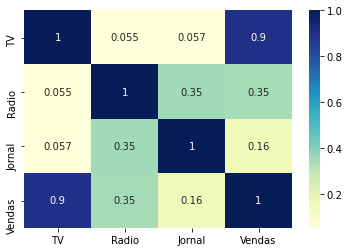

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(tabela.corr(), cmap = "YlGnBu", annot = True) #Mapa de calor no tema "YlGnBu" com descrição
plt.show()


#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [33]:
from sklearn.model_selection import train_test_split

Y = tabela["Vendas"] #Separando o resultado 
X = tabela.drop("Vendas", axis = 1) #Separando as informações

#Atribuir as variaveis de treino e de teste e definir que são as informações e os resultados
x_treino, x_teste, y_treino, y_teste = train_test_split(X, Y) 

In [34]:
#Utilizar 2 módelos de IA para que sejam comparados

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

modelo_regressao_linear = LinearRegression()
modelo_random_forest = RandomForestRegressor()

modelo_regressao_linear.fit(x_treino, y_treino) #Treinar o modelo 
modelo_random_forest.fit(x_treino, y_treino) #Treinar o modelo

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Usar o R² para dizer a porcentagem(%) de eficiencia que o modelo consegue prever

In [35]:
# Fazer as previsões com os modelos e comparar com o resultado real

previsao_regressao_linear = modelo_regressao_linear.predict(x_teste)
previsao_random_forest = modelo_random_forest.predict(x_teste)

from sklearn import metrics

print(metrics.r2_score(y_teste, previsao_regressao_linear))
print(metrics.r2_score(y_teste, previsao_random_forest))

0.8955001281400697
0.9493157398978751


#### Visualização Gráfica das Previsões

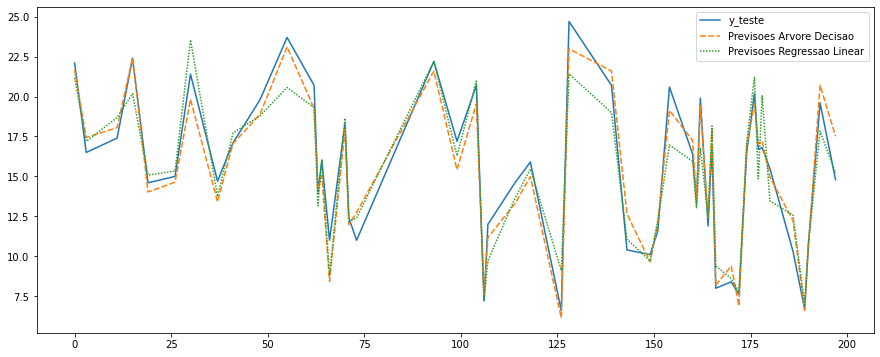

In [36]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsoes Arvore Decisao"] = previsao_random_forest
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressao_linear

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()


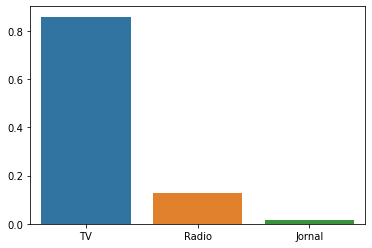

In [37]:
#Comparar a importancia de cada variavel para as vendas
#RandomForest será utilizado pois obteve maior precisão

sns.barplot(x = x_treino.columns, y = modelo_random_forest.feature_importances_)
plt.show()


In [38]:
#Para a realização de previsões sobre investimentos futuros:
#Basta aplicar a previsão(predict) do modelo nos dados dos investimentos futuros, vindos de um novo banco.